<img src="https://www.awi.de/typo3conf/ext/sms_boilerplate/Resources/Public/Images/AWI/awi_logo.svg" width=200 height=50 style="position:absolute; right:20px;">


# <center> Brownian Motion </center>

# Table of contents
   
1. [Introduction](#introduction) <br>
2. [Imports & preparation](#imports)<br>
3. [Plots](#plots)<br>
    3.1 [Brownian Motion](#pltbm)<br>
    3.2 [Distribution](#dis1000)<br>
    3.3 [Driving function](#bmdf)<br>


# 1. Introduction <a name="introduction"></a>
This notebook serves as teaching material and support for lectures, as well as for further scientific education.  

### Brownian Motion
<ul>
    <li>
        <a href="https://www.tpi.uni-jena.de/~wipf/lectures/pfad/pfad7.pdf" target="_blank">Overview article by A. Wipf, University of Jena</a>
    </li>
</ul>
<p>
    <i>"The Brownian process describes the disordered motion of small particles suspended in a liquid. It is believed that Brown studied pollen particles floating in water under the microscope. He observed minute particles executing a jittery motion. The theory of this motion has been invented by Albert Einstein and Marian Smoludchowski. The mathematically rigorous construction of the corresponding stochastic process has been developed by Norbert Wiener."</i> (Extraced from: A. Wipf <i>"Path Integrals"</i> (2019), p. 60, Brownian Motion, University of Jena)
</p>

Other references:
<ul>
    <li>
        Peter Mörters and Yuval Peres,  <i>"<a href="https://www.math.uni-frankfurt.de/~neiningr/MP.pdf" target="_blank">Brownian Motion</a>"</i>
    </li>
</ul>

_____
Notebook created by <a href="b-schwertfeger.de">Benjamin Thomas Schwertfeger</a> (November, 2021) <br>

<a href="mailto:benjamin.schwertfeger@awi.de">benjamin.schwertfeger@awi.de</a><br>
Alfred-Wegener-Institute <br>
Helmholtz Centre for Polar and Marine Research<br>

Bussestraße 24<br>
D-27570 Bremerhaven<br>
Germany<br>

_____

# 2. Imports & preparation <a name="imports"></a>
## 2.1 Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns # optional
import warnings
from tqdm import tqdm # optional

## 2.1 Settings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_style("whitegrid") 

In [3]:
# plotting constants
mpl.rcParams["font.family"] = "arial"
mpl.rcParams["figure.figsize"] = 20, 7
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["xtick.labelsize"] = 16
mpl.rcParams["ytick.labelsize"] = 16
mpl.rcParams["legend.fontsize"] = 16

## 2.2 Functions

In [4]:
def f(y, a, b, c, d): # driving function 
    return d*y**3+c*y**2+b*y-a

def F(x, b, c, d): # potential
    return -(d/4*x**4+c/3*x**3+b/2*x**2-x)

In [5]:
def rnorm(): # or use np.random.normal()
    u,v=0,0
    while u == 0:
        u = np.random.random()
    while v == 0:
        v = np.random.random()
    return np.sqrt(-2.0 * np.log(u)) * np.cos(2.0*np.pi*v)

In [6]:
def computeBM(input, randomStartPoint=False):
    '''
        Function to calculate all necessary values for the analysis of Brownian motion
        usage: result = computeBM(default_input)
    '''
    
    N = int(input["T"] / input["h"])
    t = np.arange(0, N, 1) * input["h"]
    x = None
    
    if randomStartPoint: # random initial condition,
        x = np.array([[10 * np.random.random() for x in np.empty(N)] for x in np.empty(input["Nparticle"])]) 
    else: # initial condition, all = 10 
        x = np.tile(10, (input["Nparticle"], N))  
    
    # ----> calculate particle x time matrix
    for particle in tqdm(range(0, input["Nparticle"], 1)):
        for timestep in range(N-1):
            x[particle][timestep+1] = x[particle][timestep] + input["h"] * f(x[particle][timestep], input["a"], input["b"], input["c"], input["d"]) + input["Ca"] * np.random.normal(0,1) * np.sqrt(input["h"])

    # ----> calculate limits
    # set xlim and ylim
    ama2 = np.max(x)
    ami = np.min(x)
    ama = np.max([ama2,-ami])
    ama_ = np.max([ama2,-ami])/2 # to set correct bins in hist
    
    # ----> claculate hist matrix
    Nbins = 40
    h = np.arange(N * Nbins).reshape(N, Nbins)
    bin_edges = None
    for step in range(N):
        histo, bin_edges = np.histogram(
            a=x[:,step], bins=Nbins,
            range=(-20 * ama_ / 10, 21 * ama_ / 10)
        ) 
        h[step] = histo
    
    # ----> hstat
    hstat = np.zeros(40)
    for i in range(int(N/2),N,1):
        hstat += h[i]
    hstat *= 2 / input["Nparticle"] / N
    
    return {
        "x": x, 
        "h": h, 
        "hstat": hstat,
        "limits": {"ama2": ama2, "ami": ami, "ama": ama,"ama_": ama_},
        "N": N,
        "t": t,
        "Nbins": Nbins,
        "bin_edges": bin_edges,
        
        # return the input to use them afterwards
        "Ca": input["Ca"],
        "a": input["a"],
        "b": input["b"],
        "c": input["c"],
        "d": input["d"],
        "Nparticle": input["Nparticle"],
        "T": input["T"]
    }

______

## 2.3 Define default values and calculate the results

In [7]:
default_input = {
    # constants
    "Ca": 10,          # default: 10
    "a": 1,            # default: 1
    "b": 0.8,          # default: 0.8
    "c": 0,            # default: 0
    "d": -0.001,       # default: -0.001

    "Nparticle": 1000, # default: 1000 (number of particles)
    "T": 1000,         # default: 1000 (integration time in time units)
    "h": 0.5,          # default: 0.5  (step size in time units)
}

In [8]:
result = computeBM(default_input)

100%|██████████| 1000/1000 [00:34<00:00, 28.65it/s]


____
# 3. Plots 

## 3.1 Plotting the brownian motion <a name="pltbm"></a>

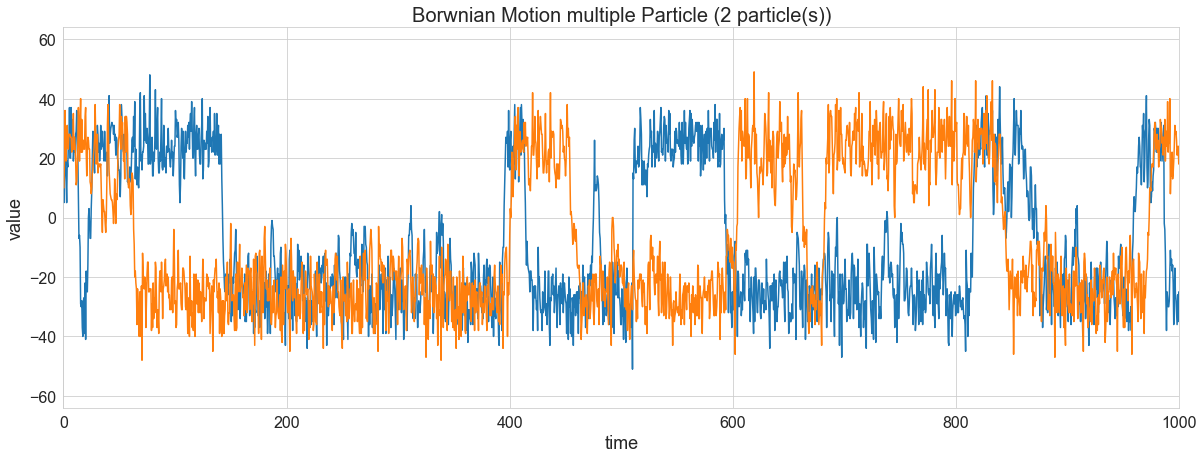

In [9]:
for line in range(2): # <- increment this to show more particles
    plt.plot(result["t"], result["x"][line])
    plt.title(f"Borwnian Motion multiple Particle ({line+1} particle(s))")
    plt.xlim(0,default_input["T"])
    plt.ylim(result["limits"]["ami"], result["limits"]["ama"]) # plt.ylim(-100,100)
    plt.xlabel("time")
    plt.ylabel("value");

## 3.2 Distrbution

### 3.2.1 Distribution of 1000 particles in the last 1000 timesteps <a name="dis1000"></a>

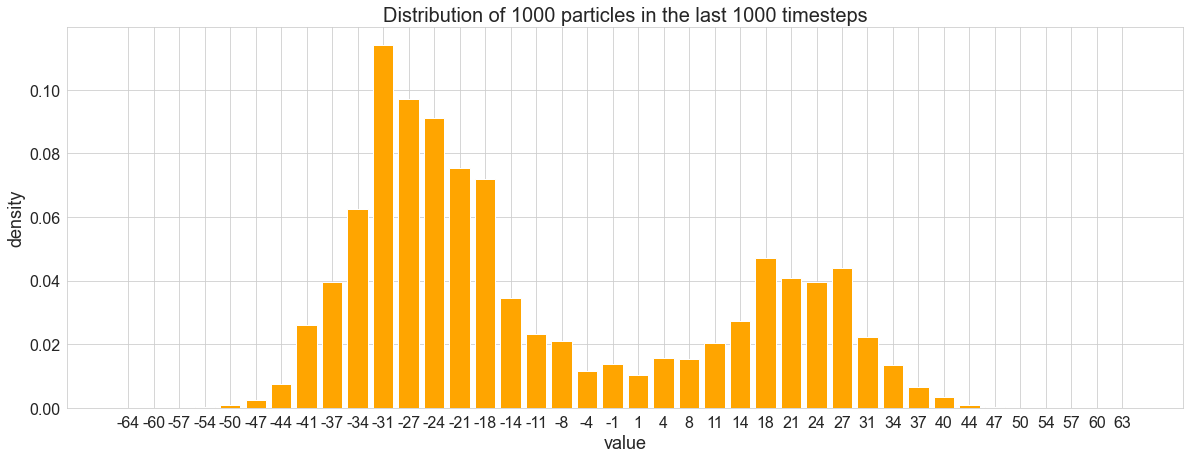

In [10]:
if False:
    # AS LINEPLOT
    plt.plot(range(result["Nbins"]), result["hstat"])
    plt.gca().set_xticks(np.arange(result["Nbins"]))
    plt.gca().set_xticklabels(result["bin_edges"][:-1].astype("int"));
    plt.xlim(0,result["Nbins"]-1)
else:
    # OR AS BARPLOT:
    height = result["hstat"]
    bars = result["bin_edges"][:-1].astype("int")
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height, color="orange")
    plt.xticks(y_pos, bars)
    
plt.title(f"Distribution of {result['Nparticle']} particles in the last {int(result['N']/2)} timesteps")
plt.xlabel("value")
plt.ylabel("density");

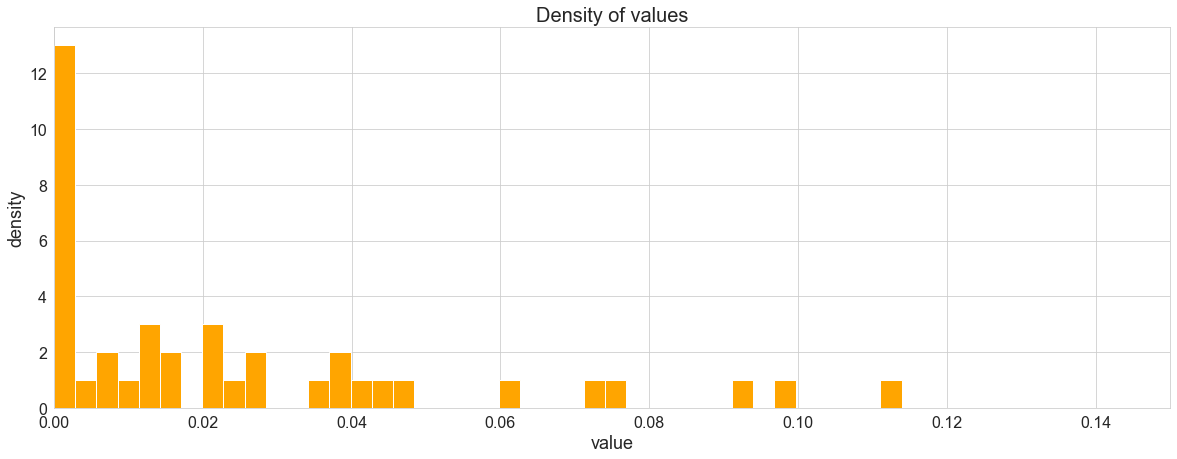

In [11]:
# how often does which value occur?
if False:
    # with seaborn
    sns.distplot(result["hstat"], bins=40)
    plt.gca().set_xlim(0,0.18);
else:
    # OR with mpl
    plt.hist(result["hstat"], bins=40, color="orange")
    plt.title("Density of values")
    plt.xlabel("value")
    plt.ylabel("density")
    plt.xlim(0,0.15);

### 3.2.2 Distribution of particles at a specific timestep <a name="distspec"></a>

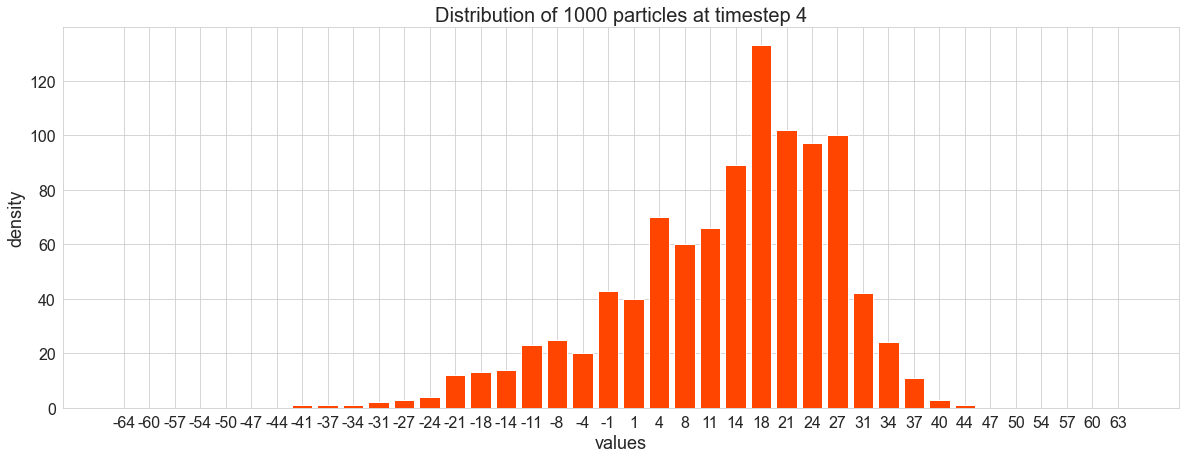

In [12]:
TIMESTEP = 4 # try: 10 OR 100 OR 1234 OR 1999

if False:
    # AS LINEPLOT:
    plt.plot(range(result["Nbins"]), result["h"][TIMESTEP] / result["Nparticle"])
    plt.title(f"Distribution of {result['Nparticle']} particles at timestep {TIMESTEP}")
    plt.xlabel("value")
    plt.ylabel("density")
    plt.gca().set_xticks(np.arange(result["Nbins"]))
    plt.gca().set_xticklabels(result["bin_edges"][:-1].astype("int"));
    plt.xlim(0,result["Nbins"]-1);
else:
    # OR AS BARPLOT:
    height =  result["h"][TIMESTEP]
    bars = result["bin_edges"][:-1].astype("int")
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height, color="orangered")
    plt.title(f"Distribution of {result['Nparticle']} particles at timestep {TIMESTEP}")
    plt.xlabel("values")
    plt.ylabel("density")
    plt.xticks(y_pos, bars);

### 3.2.3 Distribution over time and space <a name="distspti"></a>

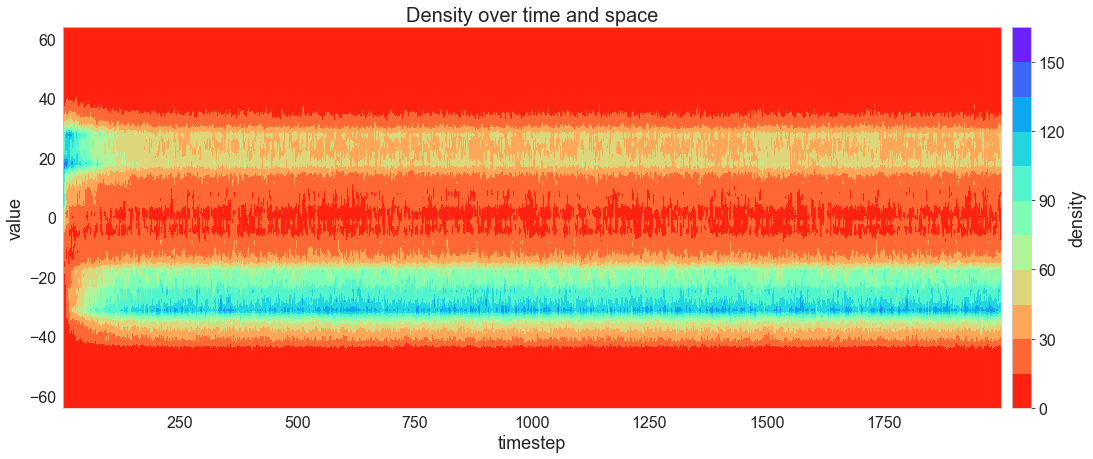

In [13]:
fig, ax = plt.subplots()
mappable = ax.contourf(
    np.arange(1,result["N"],1),
    result["bin_edges"][:-1],
    result["h"][1:].transpose(),
    cmap="rainbow_r", levels=10
)

ax.set_title(f"Density over time and space")
cbar = fig.colorbar(mappable, pad=0.01, orientation="vertical")
cbar.set_label("density")
ax.set_ylabel("value")
ax.set_xlabel("timestep");

## 3.3 Driving function <a name="bmdf"></a>

In [14]:
# constants
a, b, c, d = 1, 0.8, 0, -0.001
points = 120 

In [15]:
xVals = np.arange(points) - points / 2

yVals = np.array([f(x, a, b, c, d) for x in xVals]) # driving function (f(x))
yVals_p = np.array([F(x, b, c, d) for x in xVals])  # potential (F'(x))

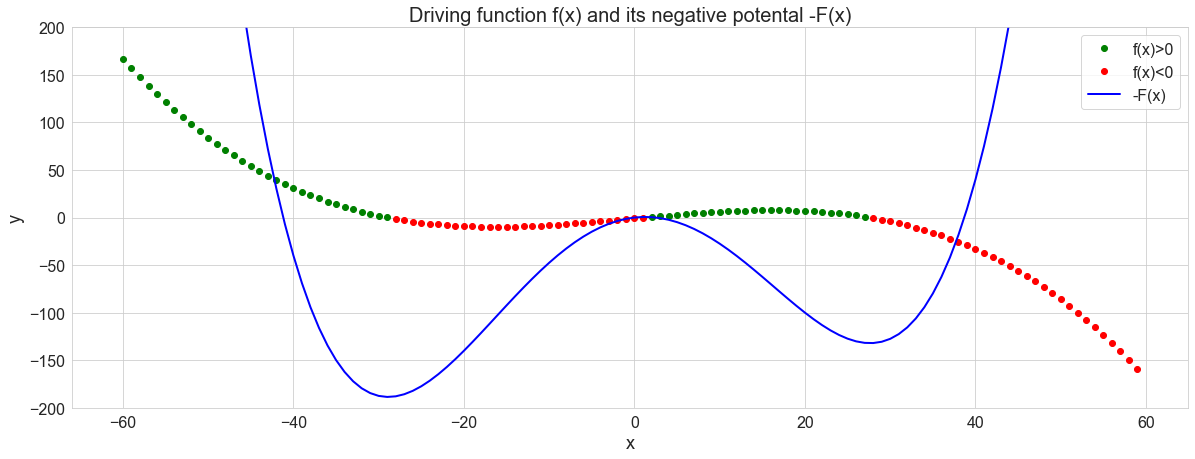

In [16]:
marker="o"
#plt.plot(xVals,yVals) # driving function f(x)
plt.plot(xVals[yVals>0],yVals[yVals>0], marker, color="green", label="f(x)>0")
plt.plot(xVals[yVals<0],yVals[yVals<0], marker, color="red", label="f(x)<0")

plt.plot(xVals, yVals_p, color="blue", lw=2, label="-F(x)") # -F(x)

plt.title("Driving function f(x) and its negative potental -F(x)")
plt.xlabel("x")
plt.ylabel("y")

plt.ylim(-200,200)
plt.legend();

## 3.3.x The way to a stable condition <a name="bmdfst"></a>

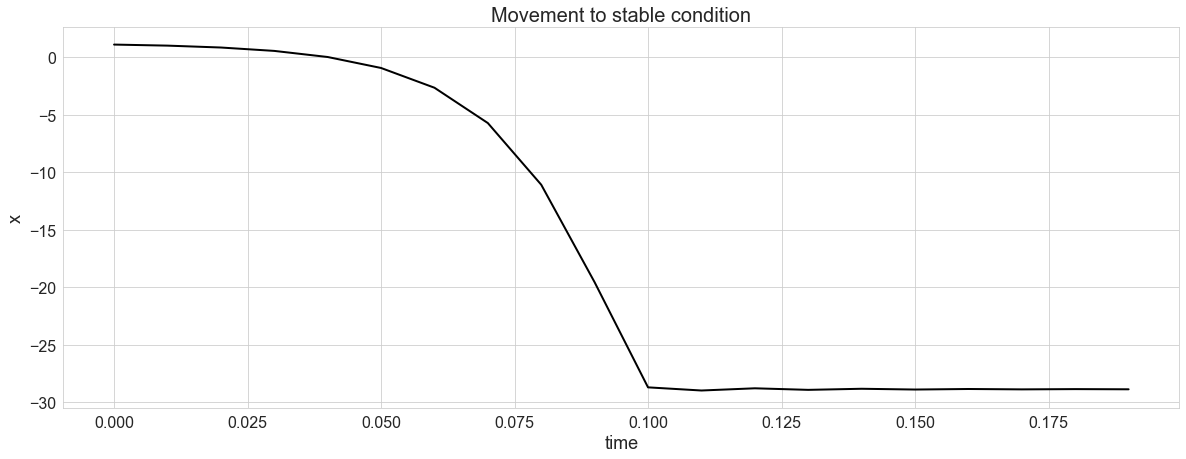

In [17]:
def pltMoving2Stable(y0):
    a, b, c, d = 1, 0.8, 0, -.001 
    h, N = 0.01, 20
    y = np.zeros(N)
    y[0] = y0
    for i in range(1,N,1):
        y[i] = y[i-1] + h + f(y[i-1], a, b, c, d)
    plt.plot(np.arange(N)*h, y, color="black", linewidth=2)
    plt.title(f"Movement to stable condition")
    plt.xlabel("time")
    plt.ylabel("x")
    
pltMoving2Stable(y0=1.125)